# xray: N-D labeled arrays and datasets #

In the following example we read in [atmospheric reanalysis data](http://icdc.zmaw.de/1/daten/reanalysis-atmosphere.html) in NetCDF format and plot the time series at some selected positions. We use the xray module to efficiently decode the datetime from the meta-information. We demonstrate the use of Pandas functions for calculating the rolling mean and min values. Finally, we calculate a linear regression of the minimum temperatures.

xray is an open source project and Python package that aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures.

Our goal is to provide a pandas-like and pandas-compatible toolkit for analytics on multi-dimensional arrays, rather than the tabular data for which pandas excels. Our approach adopts the Common Data Model for self- describing scientific data in widespread use in the Earth sciences: xray.Dataset is an in-memory representation of a netCDF file.

http://xray.readthedocs.org/en/

In [1]:
%pylab inline
import xray
import pandas as pd
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


# Datetime decoding #

When reading or writing netCDF files, xray automatically decodes datetime and timedelta arrays using CF conventions. 

In [9]:
f='/data/icdc/reanalyses/ncep_reanalysis1/DATA/2m_airtemp_monthly/air2m.mon.mean.nc'
f='/home/lars/data/air2m.mon.mean.nc' # local copy

In [8]:
!ncdump $f | head -n 40 # Show first 40 lines of ncdump

netcdf air2m.mon.mean {
dimensions:
	lat = 94 ;
	lon = 192 ;
	time = UNLIMITED ; // (814 currently)
variables:
	float lat(lat) ;
		lat:units = "degrees_north" ;
		lat:actual_range = 88.542f, -88.542f ;
		lat:long_name = "Latitude" ;
		lat:standard_name = "latitude" ;
		lat:axis = "Y" ;
	float lon(lon) ;
		lon:units = "degrees_east" ;
		lon:long_name = "Longitude" ;
		lon:actual_range = 0.f, 358.125f ;
		lon:standard_name = "longitude" ;
		lon:axis = "X" ;
	double time(time) ;
		time:long_name = "Time" ;
		time:delta_t = "0000-01-00 00:00:00" ;
		time:avg_period = "0017-00-00 00:00:00" ;
		time:prev_avg_period = "0000-00-01 00:00:00" ;
		time:standard_name = "time" ;
		time:axis = "T" ;
		time:units = "hours since 1800-01-01 00:00:0.0" ;
		time:actual_range = 1297320., 1891200. ;
	float air(time, lat, lon) ;
		air:long_name = "Monthly Mean of Air Temperature" ;
		air:valid_range = 150.f, 400.f ;
		air:units = "degK" ;
		air:add_offset = 0.f ;
		air:scale_factor = 1.f ;
		air:missing_val

In [11]:
x=xray.open_dataset(f)
x['time'][0] # check if hours since 1800-01-01 are correctly decoded

<xray.DataArray 'time' ()>
numpy.datetime64('1948-01-01T00:00:00.000000000Z')
Coordinates:
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name: Time
    delta_t: 0000-01-00 00:00:00
    avg_period: 0017-00-00 00:00:00
    prev_avg_period: 0000-00-01 00:00:00
    standard_name: time
    axis: T
    actual_range: [ 1297320.  1891200.]

# Time Series Example #

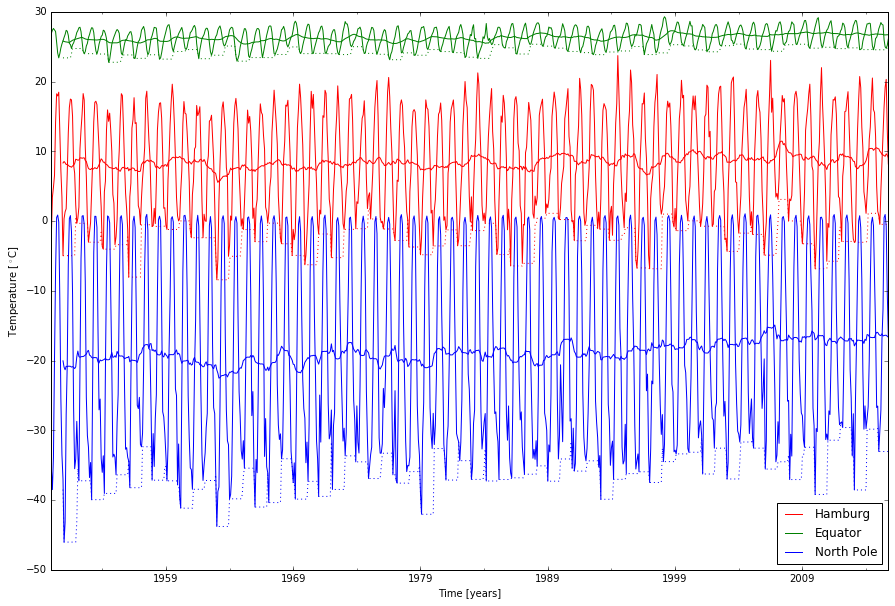

In [12]:
D={'Hamburg':(10.0,53.3),'Equator':(0.0,0.0),'North Pole':(0,90.0)} # Define locations
col={'Hamburg':'r','Equator':'g','North Pole':'b'} # Define colors
D_timeseries={} # Empty dictionary

for k in D.keys():
    lon0,lat0=D[k]
    ilon,ilat=argmin(abs(x.lon.data-lon0)),argmin(abs(x.lat.data-lat0)) # Select index for location
    D_timeseries[k]=pd.Series(x.air.data[:,ilat,ilon]-273.15,index=x['time'][:]) # Generate Time Series Object

start='1950'
stop='2015'
figure(figsize=(15,10))
for k in D_timeseries.keys():
    y1=D_timeseries[k][start:stop]
    y1.plot(color=col[k],label=k)
    pd.rolling_mean(y1,12).plot(color=col[k],label='') # Calculate rolling mean
    pd.rolling_min(y1,12).plot(color=col[k],style=':',label='')#  Calculate rolling min
    legend(loc=4)
xlabel('Time [years]')
ylabel('Temperature [$^\circ$C]')

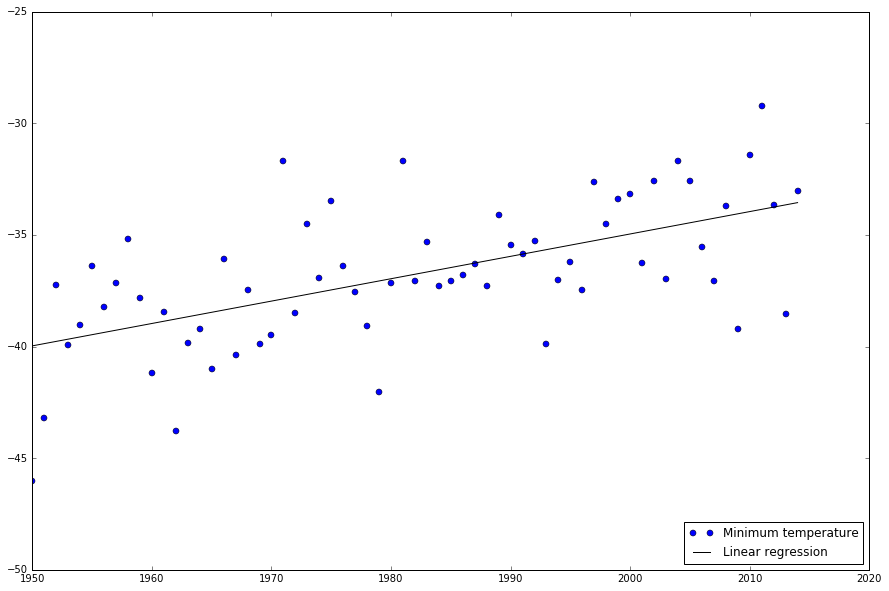

In [13]:
# Extract minimum data every 12th value as numpy arrays without NaNs
Y=pd.rolling_min(y1,12)[::12].dropna().values
X=arange(len(Y))+int(start)

slope, intercept, r_value, p_value, std_err =stats.linregress(X,Y)
figure(figsize=(15,10))
plot(X,Y,'bo',label='Minimum temperature')
plot(X,slope*X+intercept,'k-',label='Linear regression')
legend(loc=4)

# Installation #

xray is currently not installed on our system. We follow the instructions here:

http://xray.readthedocs.org/en/stable/installing.html

In [3]:
!pip3 install --user dask

Cleaning up...


In [4]:
!pip3 install --user  bottleneck

Cleaning up...


In [5]:
# git clone version works 
!pip3 install --user xray

Cleaning up...
